This notebook will create figures (1) and (2) from the paper.

In [2]:
import math
import re
import matplotlib.pyplot as plt
import pickle
import argparse

In [3]:
from typing import Callable, Dict

A generic function to plot 2 variables in Zipf format within the same plot. We use the name of the raw input files as the labels.

In [4]:
def plot_zipf(title, x_label, y_label, x_axis_code, y_axis_code, x_axis_lang, y_axis_lang, legend_labels):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_axis_code, y_axis_code, linewidth=2, color='r', label=legend_labels[0])
    plt.plot(x_axis_lang, y_axis_lang, linewidth=2, color='b', label=legend_labels[1])
    plt.xscale("log")
    plt.yscale("log")
    plt.legend(loc="upper right")
    plt.show()

Sort the ngrams by their frequency, normalize the frequencies by the total token (or ngram) count, and plot on a log-scaled graph.

In [5]:
def process_and_plot(processing_func: Callable, ngram_size: int, 
                    input_file_1: str, input_file_2: str, data_file_store_1: str, 
                    data_file_store_2: str):
  
    dict_input, input_token_count = processing_func(input_file_1, ngram_size)
    dict_output, output_token_count = processing_func(input_file_2, ngram_size)
    
    """
    Here, we sort the ngrams by frequency, from largest to smallest.
    """
    sorted_list_input = sorted(dict_input.items(), key=lambda item: item[1], reverse=True)
    sorted_list_output = sorted(dict_output.items(), key=lambda item: item[1], reverse=True)

    """
    Create indices for the plot, and divide by token count (total number of ngrams in dataset)
    to get a true probability distribution.
    """
    x_axis_input = [x+1 for x in range(len(sorted_list_input))]
    y_axis_input = [[1.0 * item[1]/input_token_count] for item in sorted_list_input]

    x_axis_output = [x+1 for x in range(len(sorted_list_output))]
    y_axis_output = [[1.0 * item[1]/output_token_count] for item in sorted_list_output]

    legend_labels = [input_file_1, input_file_2]

    pickle.dump(y_axis_input, open(data_file_store_1, "wb"))
    pickle.dump(y_axis_output, open(data_file_store_2, "wb"))

    plot_zipf("Zipf Plot", "Log Freq Rank", "Log Freq", x_axis_input, y_axis_input, x_axis_output, y_axis_output, legend_labels)

These functions do the data collection for the 4 ngrams. The inner function parses the file (removing unnecesary tokens), and creates a dictionary where the key is the token and the associated value is the frequency of the token. We pass this data to `process_and_plot` for sorting and plotting.

In [6]:
def plot_ngram_zipf(input_file_1: str, input_file_2: str, data_file_store_1: str, 
                    data_file_store_2: str, ngram_size: int):
  
  def process_ngrams(input_file: str, ngram_size: int):
    ngram_count = 0
    n_prev_tokens = []
    ngram_dict = {}

    with open(input_file) as f:
      line = f.readline()
      while line:
        line = line.split(" ")
        prev_token = ""
        n_prev_tokens = []
        for token in line:
            if token == "\n":
                break
            
            n_prev_tokens.append(token)
            if len(n_prev_tokens) < ngram_size:
              continue
    
            ngram_count+=1
            cur_ngram = "-".join(n_prev_tokens)

            if cur_ngram not in ngram_dict:
                ngram_dict[cur_ngram] = 1
            else:
                ngram_dict[cur_ngram]+=1

            del n_prev_tokens[0]

        line = f.readline()

    return ngram_dict, ngram_count
  process_and_plot(process_ngrams, ngram_size, input_file_1, input_file_2, data_file_store_1, data_file_store_2)


We have 5 changeable parameters here:

*   `ngram -> The specified ngram. Allowed values: "unigram", "bigram", "trigram", "tetragram"`
*   `data_file_1/data_file_2 -> Files where the data is located`
*    `data_file_store_1/data_file_store_2 -> Files you want to save frequencies in pickle format (must be .p files)`


NOTE: this function will calculate the zipf plots for two data files at a time, but will store pickle (.p) for you to accumulate all results into one graph.

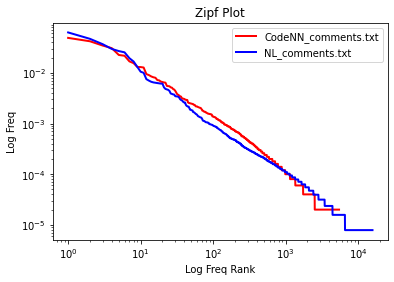

In [8]:
ngram_size = 1

# These data files correspond to the files you want to read from
data_file_1 = "CodeNN_comments.txt" 
data_file_2 = "NL_comments.txt" 

# These files correspond to where you want to store the result pickle files
# so that you can plot everything together.
data_file_store_1 = "CodeNN_unigrams.p"
data_file_store_2 = "NL_unigrams.p"

plot_ngram_zipf(data_file_1, data_file_2, data_file_store_1, data_file_store_2, ngram_size)